<a href="https://colab.research.google.com/github/VeraMendes/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/Vera_Mendes_LS_DS8_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [2]:
# looking for pd version
pd.__version__

'0.24.2'

In [3]:
# updating version
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 2.8MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [1]:
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')
df.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [6]:
#  looking for superior and inferior limits in data
df.describe()

,Unnamed: 0,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,599.500000,48.396667,153.540833,134.910833
std,346.554469,18.166802,35.132182,85.548895
min,0.000000,18.000000,100.000000,0.000000
25%,299.750000,33.000000,125.000000,65.000000
50%,599.500000,48.000000,149.000000,122.000000
75%,899.250000,64.000000,180.250000,206.000000
max,1199.000000,80.000000,246.000000,300.000000


In [0]:
#using 4 bins as maximum age registered is 80 years old and minimum is 18 years, I am organizing more or less 15.5 years in 15.5 years

age_bins = pd.cut(df['age'], 4)

#using 5 bins as maximum amount of exercise_time registered is 300 min per week and minimum 0 min per week, I am organizing more or less per each hour.

exercise_time_bins = pd.cut(df['exercise_time'], 5) 

# using 6 bins as maximum weight registered is 246 and minimum is 100, I am organizing more or less per 25lbs

weight_bins = pd.cut(df['weight'], 6)

In [0]:
# pd.crosstab(df['exercise_time'], age_bins)
# pd.crosstab(df['weight'], age_bins)
# pd.crosstab(df['weight'], exercise_time_bins)

In [36]:
# looking for relationships
crosstab = pd.crosstab(age_bins, [exercise_time_bins, weight_bins], normalize='columns')
crosstab

exercise_time       (-0.3, 60.0]       ...          (240.0, 300.0]
weight         (99.854, 124.333]       ...        (148.667, 173.0]
age                                    ...                        
(17.938, 33.5]          0.209302       ...                0.259259
(33.5, 49.0]            0.209302       ...                0.518519
(49.0, 64.5]            0.209302       ...                0.222222
(64.5, 80.0]            0.372093       ...                0.000000

[4 rows x 24 columns]

In [38]:
# looking for relationships
crosstab = pd.crosstab([age_bins, exercise_time_bins], weight_bins, normalize='columns')
crosstab

weight                         (99.854, 124.333]        ...         (221.667, 246.0]
age            exercise_time                            ...                         
(17.938, 33.5] (-0.3, 60.0]             0.030612        ...                 0.179487
               (60.0, 120.0]            0.037415        ...                 0.000000
               (120.0, 180.0]           0.068027        ...                 0.000000
               (180.0, 240.0]           0.068027        ...                 0.000000
               (240.0, 300.0]           0.098639        ...                 0.000000
(33.5, 49.0]   (-0.3, 60.0]             0.030612        ...                 0.179487
               (60.0, 120.0]            0.044218        ...                 0.000000
               (120.0, 180.0]           0.051020        ...                 0.000000
               (180.0, 240.0]           0.068027        ...                 0.000000
               (240.0, 300.0]           0.098639        ...                 0.000000
(49.0, 64.5]   (-0.3, 60.0]             0.030612        ...                 0.128205
               (60.0, 120.0]            0.027211        ...                 0.000000
               (120.0, 180.0]           0.040816        ...                 0.000000
               (180.0, 240.0]           0.057823        ...                 0.000000
               (240.0, 300.0]           0.068027        ...                 0.000000
(64.5, 80.0]   (-0.3, 60.0]             0.054422        ...                 0.410256
               (60.0, 120.0]            0.071429        ...                 0.102564
               (120.0, 180.0]           0.040816        ...                 0.000000
               (180.0, 240.0]           0.013605        ...                 0.000000
               (240.0, 300.0]           0.000000        ...                 0.000000

[20 rows x 6 columns]

In [41]:
# looking for relationships
crosstab_final = pd.crosstab(weight_bins,[age_bins, exercise_time_bins], normalize='columns')
crosstab_final

age                (17.938, 33.5]      ...         (64.5, 80.0]
exercise_time        (-0.3, 60.0]      ...       (240.0, 300.0]
weight                                 ...                     
(99.854, 124.333]        0.140625      ...                  0.0
(124.333, 148.667]       0.140625      ...                  1.0
(148.667, 173.0]         0.140625      ...                  0.0
(173.0, 197.333]         0.203125      ...                  0.0
(197.333, 221.667]       0.265625      ...                  0.0
(221.667, 246.0]         0.109375      ...                  0.0

[6 rows x 20 columns]

In [0]:
import matplotlib.pyplot as plt

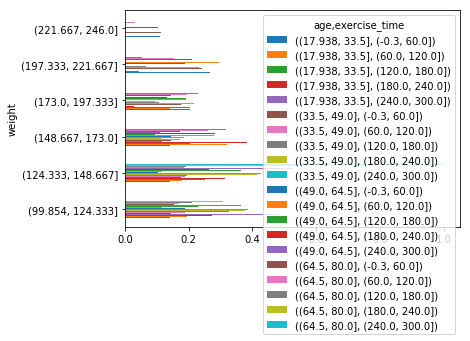

In [43]:
crosstab_final.plot(kind='barh');

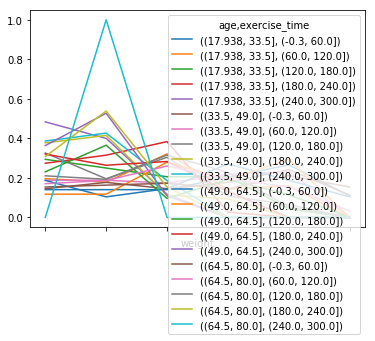

In [62]:
crosstab_final.plot();


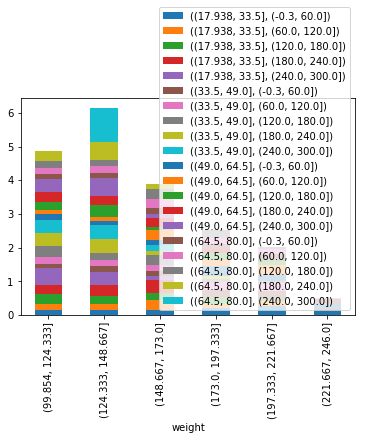

In [51]:
crosstab_final.plot(kind='bar', stacked=True, );
plt.legend(loc='best');

Text(0.5, 0, 'weight')

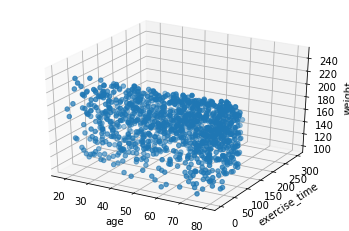

In [55]:
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')

ax.scatter3D(df['age'], df['exercise_time'], df['weight'])
ax.set_xlabel("age")
ax.set_ylabel("exercise_time")
ax.set_zlabel("weight")

In [0]:
# trying bigger bins

age_bins2 = pd.cut(df['age'], 3)


exercise_time_bins2 = pd.cut(df['exercise_time'], 2) 


weight_bins2 = pd.cut(df['weight'], 4)

In [57]:
new_crosstab = pd.crosstab(weight_bins2,[age_bins2, exercise_time_bins2], normalize='columns')
new_crosstab

age             (17.938, 38.667]      ...       (59.333, 80.0]
exercise_time      (-0.3, 150.0]      ...       (150.0, 300.0]
weight                                ...                     
(99.854, 136.5]         0.286408      ...             0.472973
(136.5, 173.0]          0.286408      ...             0.432432
(173.0, 209.5]          0.305825      ...             0.094595
(209.5, 246.0]          0.121359      ...             0.000000

[4 rows x 6 columns]

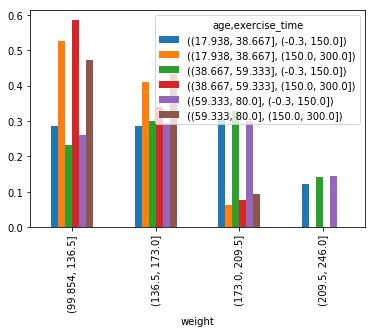

In [64]:
new_crosstab.plot(kind='bar');

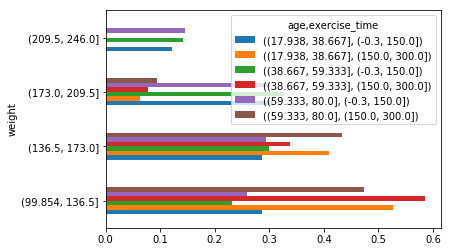

In [65]:
new_crosstab.plot(kind='barh');

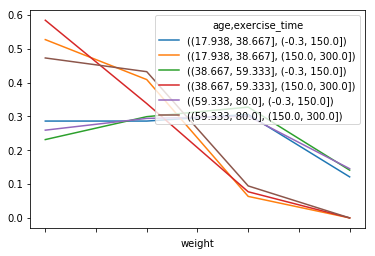

In [63]:
new_crosstab.plot();

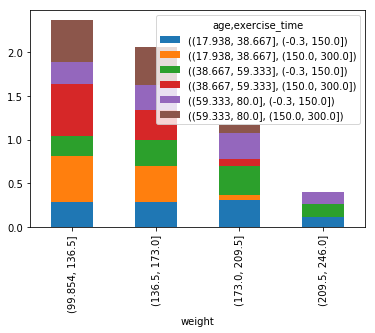

In [66]:
new_crosstab.plot(kind='bar', stacked=True, );

In [0]:
# from all my experiments and resources, I believe the last plot is the one that demonstrates better the data.
# As per this last one: 
# people who exercises more hours, does not even appear on the bar related to the heavier people
# people who exercise more is generally lighter
# people who exercises less tends to be heavier
# exercise time starts in negative values which is not correct, you either exercise or not.
# the middle age seems to be the class where people who exercise more, tends to be lighter
# this does not account for the number of people in eaxh age class
# this does not account for height
# this does not account for genetics 
# this does not account for diet
# maybe even more confounding variables to take account for

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


In [0]:
#  1. Variables: age is discrete, weight and exercise_time are continuous.
# They are all floats when representing the data because they were divided in bins, but on original type, they are all integers. 
#  2. Age is an independent variable but can influence the exercise_time and weight, which makes these last two depending on age. 
# Exercise_time can in its own term be independent variable that influenciates the weight as dependent variable.
#  3. The relationship between age and exercise_time and between exercise_time and weight are "real" but at the same time, considering other confounding variables, they are not enough to take a final conclusion on a sutdy like this.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)

In [75]:
# looking for Spurious Correlation
example_1 = pd.crosstab(exercise_time_bins, weight_bins)
example_1.head()

weight,"(99.854, 124.333]","(124.333, 148.667]","(148.667, 173.0]","(173.0, 197.333]","(197.333, 221.667]","(221.667, 246.0]"
exercise_time,,,,,,
"(-0.3, 60.0]",43,42,43,52,63,35
"(60.0, 120.0]",53,54,81,60,64,4
"(120.0, 180.0]",59,56,51,42,15,0
"(180.0, 240.0]",61,66,51,14,0,0
"(240.0, 300.0]",78,86,27,0,0,0


In [98]:
# healthy weight BMI limits
# related with exercise_time
crosstab_1 = example_1.iloc[:,[0,1, 2, 3]]
crosstab_1

weight,"(99.854, 124.333]","(124.333, 148.667]","(148.667, 173.0]","(173.0, 197.333]"
exercise_time,,,,
"(-0.3, 60.0]",43,42,43,52
"(60.0, 120.0]",53,54,81,60
"(120.0, 180.0]",59,56,51,42
"(180.0, 240.0]",61,66,51,14
"(240.0, 300.0]",78,86,27,0


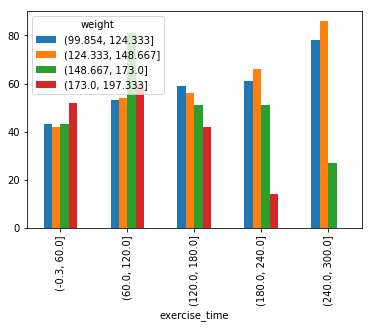

In [104]:
crosstab_1.plot(kind='bar');

In [100]:
# overweight individuals
# related with exercise_time
crosstab_2 = example_1.iloc[:,[4, 5]]
crosstab_2

weight,"(197.333, 221.667]","(221.667, 246.0]"
exercise_time,,
"(-0.3, 60.0]",63,35
"(60.0, 120.0]",64,4
"(120.0, 180.0]",15,0
"(180.0, 240.0]",0,0
"(240.0, 300.0]",0,0


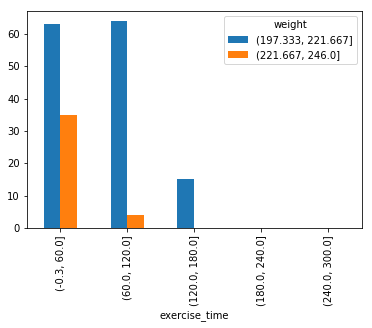

In [105]:
crosstab_2.plot(kind='bar');

In [106]:
# looking for Spurious Correlation
example_2 = pd.crosstab(age_bins, weight_bins)
example_2.head()

weight,"(99.854, 124.333]","(124.333, 148.667]","(148.667, 173.0]","(173.0, 197.333]","(197.333, 221.667]","(221.667, 246.0]"
age,,,,,,
"(17.938, 33.5]",89,83,76,37,29,7
"(33.5, 49.0]",86,87,55,36,34,7
"(49.0, 64.5]",66,75,52,43,35,5
"(64.5, 80.0]",53,59,70,52,44,20


In [107]:
# young individuals
# related with weight
crosstab_3 = example_2.iloc[[0],:]
crosstab_3

weight,"(99.854, 124.333]","(124.333, 148.667]","(148.667, 173.0]","(173.0, 197.333]","(197.333, 221.667]","(221.667, 246.0]"
age,,,,,,
"(17.938, 33.5]",89,83,76,37,29,7


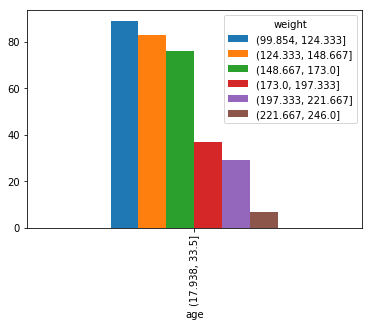

In [113]:
crosstab_3.plot(kind='bar');

In [109]:
# elderly individuals
# related with weight
crosstab_4 = example_2.iloc[[3],:]
crosstab_4

weight,"(99.854, 124.333]","(124.333, 148.667]","(148.667, 173.0]","(173.0, 197.333]","(197.333, 221.667]","(221.667, 246.0]"
age,,,,,,
"(64.5, 80.0]",53,59,70,52,44,20


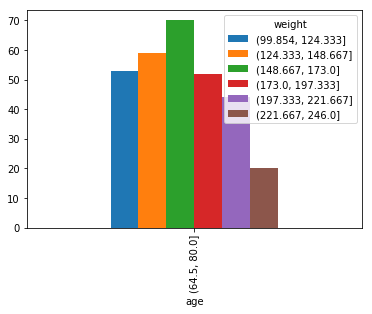

In [114]:
crosstab_4.plot(kind='bar');

In [111]:
# adult individuals
# related with weight
crosstab_5 = example_2.iloc[[1,2],:]
crosstab_5

weight,"(99.854, 124.333]","(124.333, 148.667]","(148.667, 173.0]","(173.0, 197.333]","(197.333, 221.667]","(221.667, 246.0]"
age,,,,,,
"(33.5, 49.0]",86,87,55,36,34,7
"(49.0, 64.5]",66,75,52,43,35,5


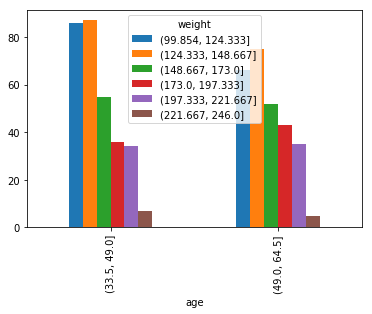

In [115]:
crosstab_5.plot(kind='bar');

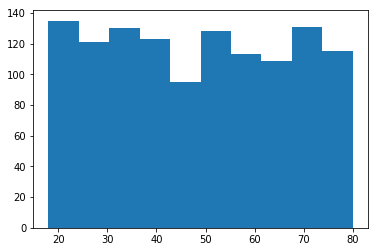

In [116]:
histogram_age=plt.hist(df.age)

In [0]:
# It seems there are people in all ages in this data and the distribution of these people was made more or less equally in all the group ages. 
# Overweighted people does not seem to exercise at all more than 3 hours per week but maybe as soon as they start exercising more, they start to loose weight, so their class in data changes same as when you exercise more, does not seem there are people weighting much.
# As younger, as lighter, but maybe you are still growing.